## Karakas 2010 yields from MCMC

Using all default settings. Time taken was 4299.766675710678  seconds

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Output from mcmc

[array([[-2.70296043, -3.07486087, -0.75194978, -0.29123924,  0.51871529,
          0.50217262]]),
 'initial minimization',
 (array([-2.68304278, -3.0362274 , -0.77824288]), 1.069812759180552),
 'step 1 global minimization',
 array([[-2.68304278, -3.0362274 , -0.77824288, -0.32036316,  0.49277952,
          0.45195536]]),
 'step 1 local minimization',
 (array([-2.72857389, -3.08996898, -0.79428642]), 1.1084093390131533),
 'step 2 global minimization',
 array([[-2.72857389, -3.08996898, -0.79428642, -0.3435005 ,  0.44715179,
          0.41429241]]),
 'step 2 local minimization',

[1.069812759180552, 1.1084093390131533]]


In [2]:
from Chempy.plot_mcmc import restructure_chain
restructure_chain('karakas10/')

blob shape =  (64, 303, 22, 1) probably some runs did not return results and were stored anyway.
The chain has a length of 303 iterations, each iteration having 64 evaluations/walkers
Mean posteriors at the beginning and the end of the chain:
-1.37415732046 -0.0644624776272
Mean posteriors after the burn-in tail is cut out:
-1.37415732046 -1.37351918182
We are left with a sample of 4992 posterior evaluations from the converged MCMC chain
We have 4990 iterations good enough posterior, their posteriors range from
2 runs of the stabilised MCMC had a posterior that was worse -15 ln
1.44956242711 -12.774860528
Highest posterior was obtained at parameters:  [[-2.65589367 -2.82262019 -0.8408339  -0.38275959  0.53528676  0.51009285]]
Number of unique posterior values:  2574
Inferred marginalized parameter distributions are:
0 -2.63056427689 +- 0.0923373251025
1 -2.80911639102 +- 0.168416879634
2 -0.8218930704 +- 0.300196148878
3 -0.270093400902 +- 0.280734949936
4 0.552184876323 +- 0.091720638

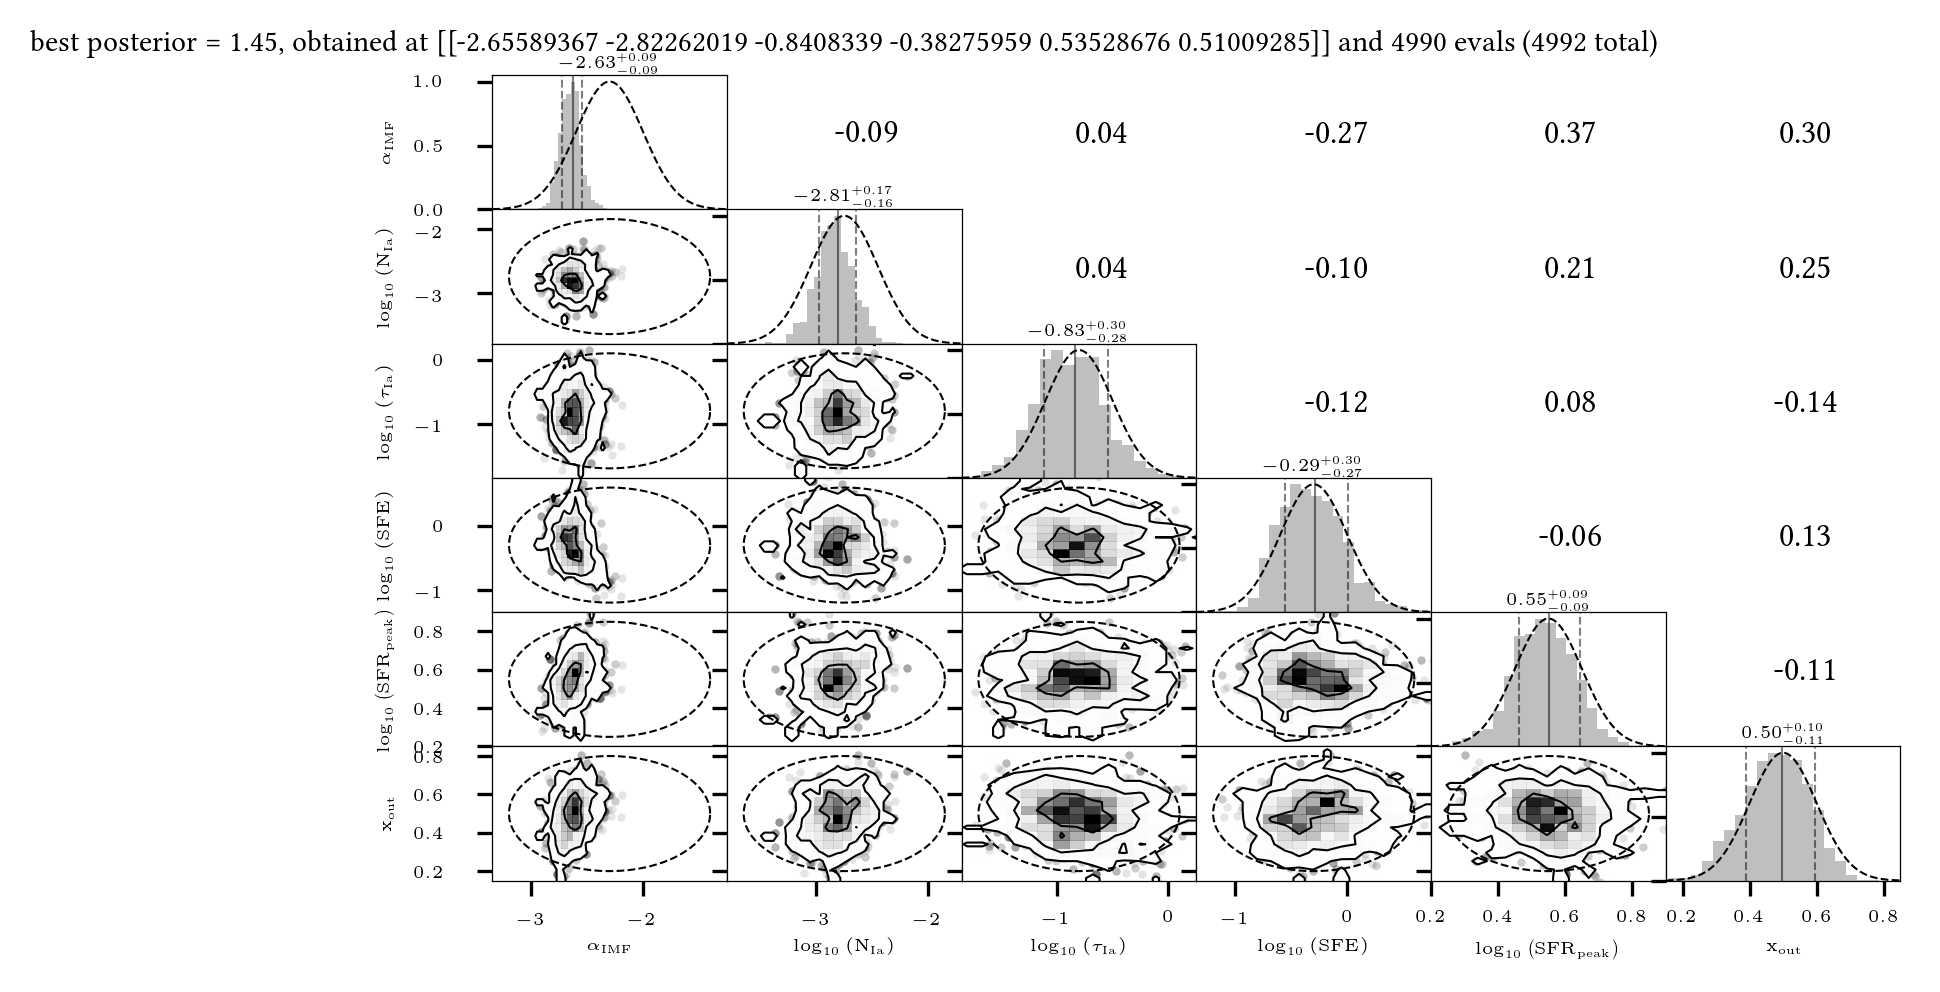

In [3]:
from Chempy.plot_mcmc import plot_mcmc_chain_with_prior
plot_mcmc_chain_with_prior('karakas10/',use_prior = True, only_first_star = False,plot_true_parameters = False,plot_only_SSP_parameter = False)

In [80]:
from Chempy.cem_function import cem2
from Chempy.parameter import ModelParameters
a=ModelParameters()
a.p0 = np.array([-2.63,-2.81,-0.83,-0.29,0.55,0.50]) # Parameters found by model
abundances, names = cem2(a) # predict abundances


/home/philcox/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))


In [81]:
from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar,'Asplund09')()
sol_table = basic_solar.table
names = np.asarray(names)
abundances = np.asarray(abundances)

abundance_list = [] # To reorder abundance data
sol_error = [] # Solar data
sun_list = []

for i,item in enumerate(a.element_names):
    temp_error = sol_table['error'][np.where(sol_table['Symbol']==item)]
    temp_abundance = abundances[np.where(names==item)]
    sol_error.append(temp_error)
    abundance_list.append(temp_abundance)
    if item != "C+N":
        if item == 'He':
            sun_list.append(0.05)
        else:
            sun_list.append(0.04) ## add 0.04dex to get protosolar abundances (Asplund 2009)
    else:
        sun_list.append(np.log10(2.)) 

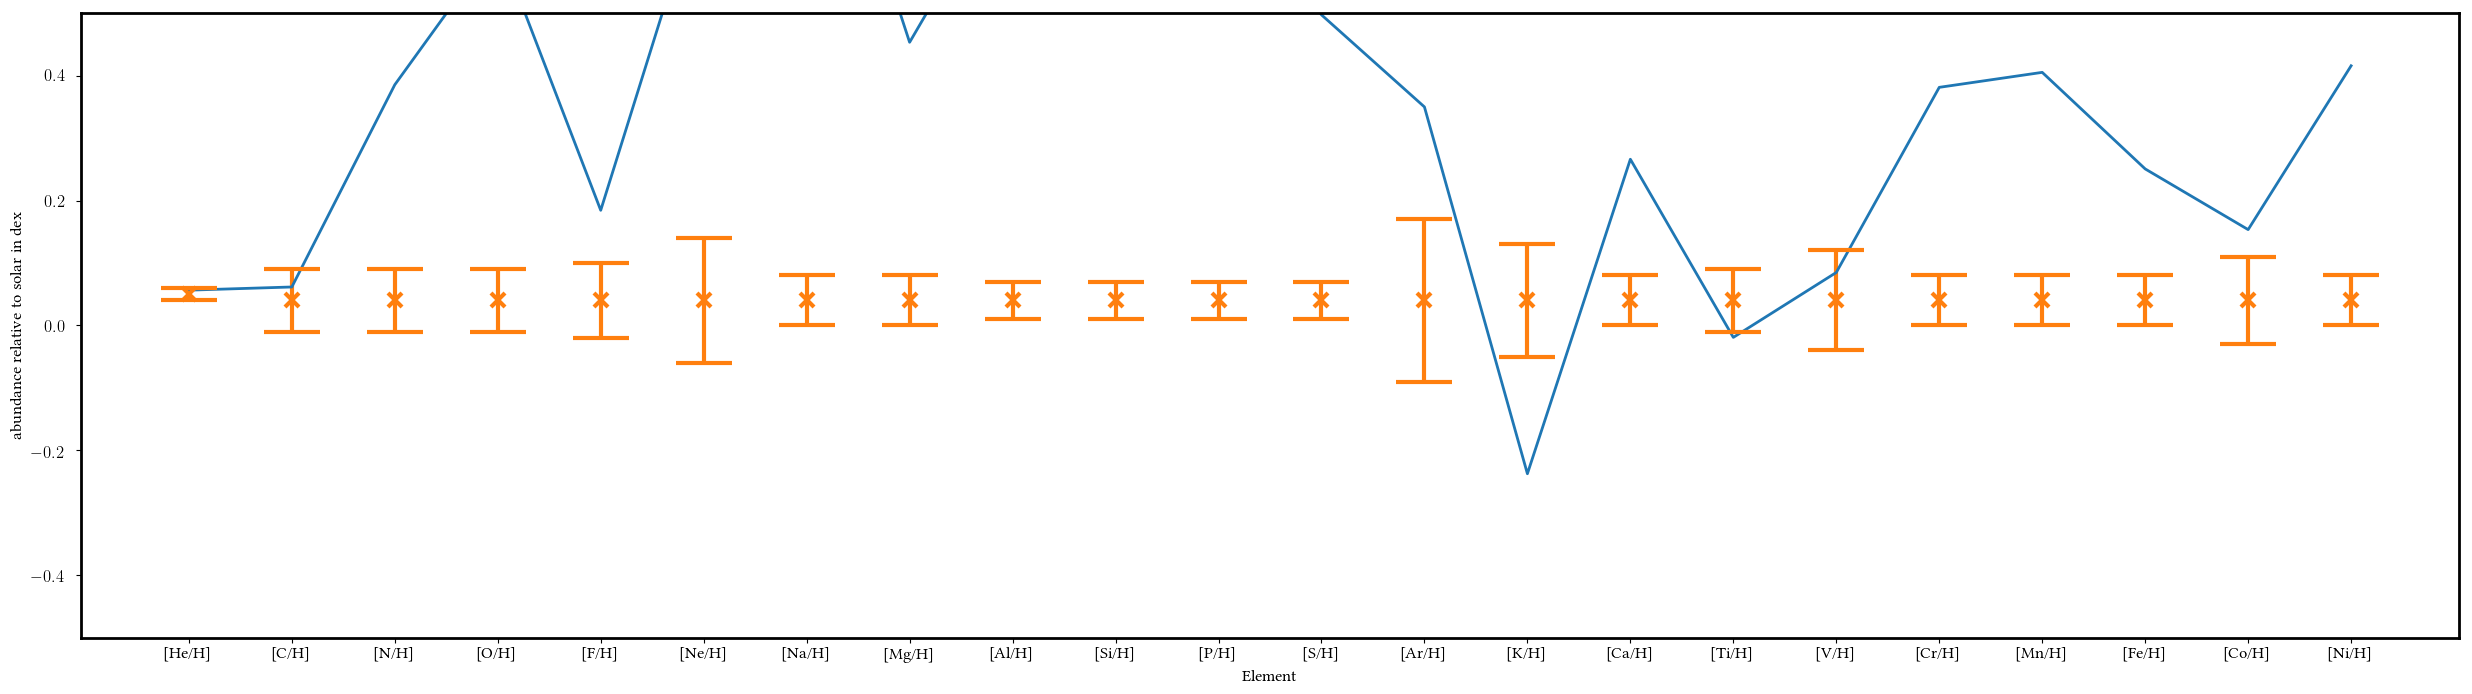

In [82]:
fig = plt.figure(figsize=(30.69,8.27), dpi=100)
ax = fig.add_subplot(111)
plt.plot(np.arange(len(a.element_names)),abundance_list,label='Final model abundances',linestyle='-') # Plot model data
plt.errorbar(np.arange(len(a.element_names)),sun_list,xerr=None,yerr=sol_error,linestyle = '',mew=3,marker='x',capthick =3,capsize = 20, ms = 10,elinewidth=3,label='solar')
plt.ylim((-0.5,0.5))
abundance_names = ['[%s/H]' %(item) for item in a.element_names]
plt.xticks(np.arange(len(a.element_names)),abundance_names)
plt.ylabel("abundance relative to solar in dex")
plt.xlabel("Element")

In [100]:
posterior = np.load('karakas10/flatmeanposterior.npy')

array([-0.06536255, -0.06669816, -0.06814685, -0.07095621, -0.07373951,
       -0.09987541, -0.14086115, -0.21771449, -0.31661807, -0.50333721,
       -0.81221935, -1.06796134, -1.27534603, -1.34296055, -1.48793166,
       -1.74188093, -1.92805784, -2.3219491 , -1.94369815, -1.83647208,
       -1.46843803, -1.34916392, -1.69969132, -1.90766785, -1.84344267,
       -1.99226823, -2.12362921, -1.96559923, -2.02321946, -2.00022126,
       -2.22719875, -2.41391953, -2.29678122, -2.44314139, -2.62087416,
       -2.4702855 , -2.25477677, -2.20037028, -2.12740114, -2.12515098,
       -2.11888665, -1.93067139, -2.03285991, -1.93640199, -1.99393595,
       -2.10347786, -1.95627958, -1.97440918, -1.87650873, -2.07578798,
       -2.09014779, -1.90430806, -1.93177595, -1.75505351, -1.55486302,
       -1.77312608, -1.79214721, -1.86062295, -2.07545893, -1.92047909,
       -1.82620428, -1.76013596, -2.05305645, -2.14961862, -2.11843953,
       -2.01843772, -1.97915739, -1.98566377, -1.90563041, -1.68